In [2]:
# Bibliotecas 

import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#  DataSet de Moradores, por tipo de esgotamento sanitário

df_esgotamento_original = bd.read_table(
    dataset_id='br_ibge_censo_2022',
    table_id='domicilio_esgotamento_sanitario_municipio',
    billing_project_id='opendataday2024-416318'
)

# DataSet de número de domicilios 

df_domicilio_original = bd.read_table(
    dataset_id='br_ibge_censo_2022',
    table_id='domicilio_morador_municipio',
    billing_project_id='opendataday2024-416318'
)



Downloading: 100%|██████████| 5570/5570 [00:00<00:00, 10975.81rows/s]


In [4]:
df_esgotamento_original.head(10)

,ano,id_municipio,tipo_esgotamento_sanitario,domicilios
0,2022,1703602,Vala,<NA>
1,2022,3138625,Vala,<NA>
2,2022,3168200,Vala,<NA>
3,2022,3533809,Vala,<NA>
4,2022,3534203,Vala,<NA>
5,2022,4124905,Vala,<NA>
6,2022,4208005,Vala,<NA>
7,2022,4306320,Vala,<NA>
8,2022,5209606,Vala,<NA>
9,2022,5221304,Vala,<NA>


In [5]:
df_domicilio_original.head(10)

,id_municipio,domicilios,moradores
0,3546256,768,2116
1,5206909,768,1899
2,2208551,768,2364
3,5219456,1024,2688
4,3101300,1024,2739
5,4305603,1280,3253
6,3161650,1280,3140
7,5200829,1280,3259
8,1703867,1280,3628
9,5206503,1536,3879


In [6]:
# Tratamento do campo de municipio
df_esgotamento_original['id_municipio'] = pd.to_numeric(df_esgotamento_original['id_municipio'], errors='coerce').astype('Int64')

df_domicilio_original['id_municipio'] = pd.to_numeric(df_domicilio_original['id_municipio'], errors='coerce').astype('Int64')


In [7]:
# Filtro Baixda Santista

# Lista dos municipios da baixada santista usada para filtro
municipios = [3548500,3551009,3541000,3518701,3513504,3506359]


#Filtro dataset esgotameto
df_esgotamento_bx = df_esgotamento_original[df_esgotamento_original['id_municipio'].isin(municipios)]


#Filtro dataset domicilio
df_domicilio_bx = df_domicilio_original[df_domicilio_original['id_municipio'].isin(municipios)]


# Tratamento para adicionar a descrição da cidade
descricao_dict = {3548500: 'Santos', 3551009: 'São Vicente', 3541000: 'Praia Grande', 3518701: 'Guarujá', 3513504: 'Cubatão', 3506359: 'Bertioga'}
df_esgotamento_bx['Descricao_Cidade'] = df_esgotamento_bx['id_municipio'].map(descricao_dict)


descricao_dict = {3548500: 'Santos', 3551009: 'São Vicente', 3541000: 'Praia Grande', 3518701: 'Guarujá', 3513504: 'Cubatão', 3506359: 'Bertioga'}
df_domicilio_bx['Descricao_Cidade'] = df_domicilio_bx['id_municipio'].map(descricao_dict)


In [8]:
df_esgotamento_bx['tipo_esgotamento_sanitario'].unique()

array(['Vala', 'Outra forma', 'Rede geral ou pluvial',
       'Fossa rudimentar ou buraco', 'Rio, lago, córrego ou mar',
       'Não tinham banheiro nem sanitário',
       'Fossa séptica ou fossa filtro ligada à rede',
       'Rede geral, rede pluvial ou fossa ligada à rede',
       'Fossa séptica ou fossa filtro não ligada à rede'], dtype=object)

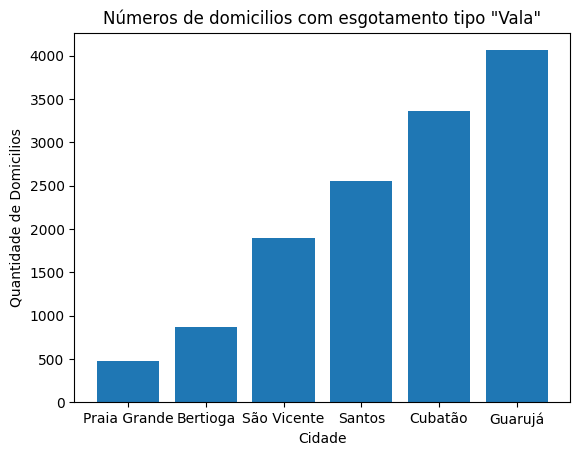

In [9]:
# Comparativos de esgotamento sanitário do tipo Vala entre os municipios
df_esgotamento_bx_vala  = df_esgotamento_bx[df_esgotamento_bx['tipo_esgotamento_sanitario'] == 'Vala']

df_esgotamento_bx_vala_sorted = df_esgotamento_bx_vala.sort_values(by='domicilios')
plt.bar(df_esgotamento_bx_vala_sorted['Descricao_Cidade'], df_esgotamento_bx_vala_sorted['domicilios'])
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Domicilios')
plt.title('Números de domicilios com esgotamento tipo "Vala"')
plt.show()


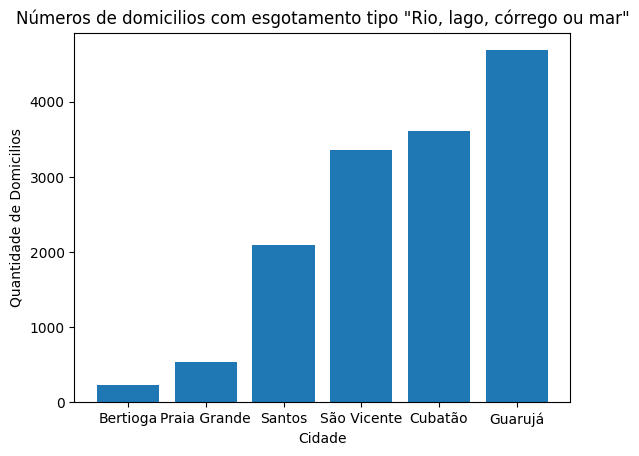

In [18]:
# Comparativos de esgotamento sanitário do tipo "Rio, lago, córrego ou mar" entre os municipios
df_esgotamento_bx_mar  = df_esgotamento_bx[df_esgotamento_bx['tipo_esgotamento_sanitario'] == 'Rio, lago, córrego ou mar']

df_esgotamento_bx_mar_sorted = df_esgotamento_bx_mar.sort_values(by='domicilios')
plt.bar(df_esgotamento_bx_mar_sorted['Descricao_Cidade'], df_esgotamento_bx_mar_sorted['domicilios'])
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Domicilios')
plt.title('Números de domicilios com esgotamento tipo "Rio, lago, córrego ou mar"')
plt.show()

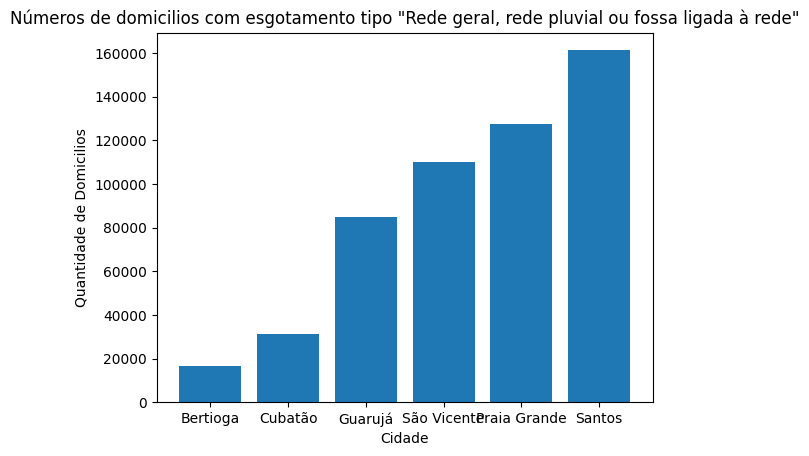

In [11]:
# Comparativos de esgotamento sanitário do tipo "Rede geral, rede pluvial ou fossa ligada à rede" entre os municipios
df_esgotamento_bx_rede  = df_esgotamento_bx[df_esgotamento_bx['tipo_esgotamento_sanitario'] == 'Rede geral, rede pluvial ou fossa ligada à rede']

df_esgotamento_bx_rede_sorted = df_esgotamento_bx_rede.sort_values(by='domicilios')
plt.bar(df_esgotamento_bx_rede_sorted['Descricao_Cidade'], df_esgotamento_bx_rede_sorted['domicilios'])
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Domicilios')
plt.title('Números de domicilios com esgotamento tipo "Rede geral, rede pluvial ou fossa ligada à rede"')
plt.show()

In [12]:
df_domicilio_bx.head(10)

,id_municipio,domicilios,moradores,Descricao_Cidade
1204,3548500,167478,416817,Santos
1332,3518701,99388,287098,Guarujá
2845,3551009,119683,324205,São Vicente
3371,3513504,40091,112397,Cubatão
4366,3506359,22728,63985,Bertioga
5549,3541000,130046,348540,Praia Grande


In [22]:
df_esgotamento_bx_santos  = df_esgotamento_bx[df_esgotamento_bx['Descricao_Cidade'] == 'Cubatão']

df_esgotamento_bx_santos_sorted = df_esgotamento_bx_santos.sort_values(by='domicilios')

df_esgotamento_bx_santos_sorted.head(10)

,ano,id_municipio,tipo_esgotamento_sanitario,domicilios,Descricao_Cidade
30998,2022,3513504,Não tinham banheiro nem sanitário,7,Cubatão
9584,2022,3513504,Outra forma,51,Cubatão
49042,2022,3513504,Fossa séptica ou fossa filtro não ligada à rede,702,Cubatão
36866,2022,3513504,Fossa séptica ou fossa filtro ligada à rede,822,Cubatão
18715,2022,3513504,Fossa rudimentar ou buraco,1112,Cubatão
3204,2022,3513504,Vala,3355,Cubatão
25749,2022,3513504,"Rio, lago, córrego ou mar",3605,Cubatão
16317,2022,3513504,Rede geral ou pluvial,30437,Cubatão
40170,2022,3513504,"Rede geral, rede pluvial ou fossa ligada à rede",31259,Cubatão


In [23]:
# Concatena os dataframes de esgotamento mar com o total de domicilio
df_prop_mar = pd.merge(df_esgotamento_bx_mar_sorted, df_domicilio_bx_sorted, on="Descricao_Cidade")

NameError: name 'df_domicilio_bx_sorted' is not defined

In [ ]:
# Cria a coluna de Proporção
df_prop_mar['Percentual'] = df_prop_mar['domicilios_x'] / df_prop_mar['domicilios_y'] * 100

In [19]:
# Gráfico de Proporção
df_prop_mar_sorted = df_prop_mar.sort_values(by='Percentual')
plt.bar(df_prop_mar_sorted['Descricao_Cidade'], df_prop_mar_sorted['Percentual'])
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Domicilios % ')
plt.title('Proporção de esgotamento em "Rio, lago, córrego ou mar" X total de domicilios')
plt.show()

NameError: name 'df_prop_mar' is not defined